**Linear Regression**

* Linear Regression is a machine learning algorithm based on supervised learning(Supervise in the sense that the algorithm can answer your question based on labeled data that you feed to the algorithm),It performs a regression task,Regression models a target prediction value based on independent variables. 

* It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s).

* It is mostly used for finding out the relationship between variables and forecasting

**Simple Linear Regression Model**

• The equation that describes how y is related to x and an error term is called the regression model.

• The simple linear regression model is: y = b0 + b1x +e

* **where:**
* b0 and b1 are called **parameters of the model**, e is a random variable called the **error term**

In [1]:
#we will discuess all the concepts with coding examples

In [2]:
#import the necessary libraries
import pandas as pd #for reading the file
import matplotlib.pyplot as plt    #ploting purpose
from sklearn.metrics import mean_squared_error as mse

In [3]:
jagadeesh_df=pd.read_csv('C:/Users/jagadeesh baman/Documents/Jagadeesh/Sales_data.csv')
jagadeesh_df

,Student_Population,Sales_of_books
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [4]:
#Assume that Student_Population column consist diffrent Branch of students (in k) from cbit college, have purchased 

# books from the Book store,so here we need to figure out is there any relationship B/W This two variables

Whenever we do Linear Regression, we need to start by plotting a scatter plot Between the dependent variable(on x-axis) & the independent variable(y-axis), if there is no realationship exist then we do not need to do LR

Text(0.5, 0, 'Student_Population')

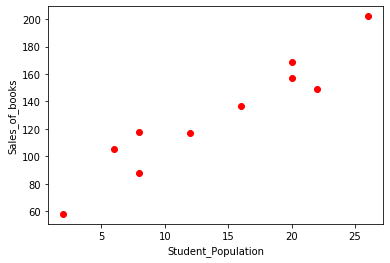

In [5]:
#Plotting a scttor plot
plt.scatter(jagadeesh_df['Student_Population'],jagadeesh_df['Sales_of_books'],color='red',label = 'data points')
plt.ylabel('Sales_of_books')
plt.xlabel('Student_Population')

In [6]:
#by looking the above plot we can say that there is a +ve relationship B/W x & y

* we have two methods two predict the linear regression

* **1.OLS Method** AND

* **2.Direct Method**

**OLS Method**

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
x=jagadeesh_df['Student_Population']
y=jagadeesh_df['Sales_of_books']
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
fit_data=model.fit()
print(fit_data.summary())

                            OLS Regression Results                            
Dep. Variable:         Sales_of_books   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           2.55e-05
Time:                        11:16:20   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


* The Equation that we got here is Y=60+5x
* It means that if there is **1 unit increses in x,** dependent variable **'y' will increses by 5**

* **Individual signification**
* in the OLS method we got Student_Population's p-value as is lessthan alpha (by defalut we assume alpha=0.05) so the indipendent variable is significanse


* in this we got coefficient of determintion as('R-squared:') : 0.903,

* Which mean that 90.3% of variability of y, can be explained with the help of the dependent valriale x 

In [9]:
y_28=60+5*28
y_28

200

**#2ND-Direct Method**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = jagadeesh_df['Student_Population'].values.reshape(-1,1)
Y= jagadeesh_df['Sales_of_books'].values.reshape(-1,1)  # reshaping to column

In [12]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [13]:
reg.intercept_[0], reg.coef_[0][0]

(60.0, 5.0)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#train test split 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state=0)

# regressor object to predict result 
regressor = LinearRegression()
regressor.fit(X_train , Y_train )

y_pred = regressor.predict(X_test)

In [16]:
y_pred

array([[103.97906404],
       [176.69458128],
       [124.75492611]])

In [17]:
value_28=regressor.predict([[28.0]])

In [18]:
value_28

array([[207.85837438]])

In [19]:
Y_test

array([[ 88],
       [149],
       [117]], dtype=int64)

In [20]:
# Root Mean Squared Error on training dataset
from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(Y_test,y_pred)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)



RMSE on test dataset :  18.9952555378096


In [21]:
#I expalined SLR by taking a simple data for understanding purpose, Hope it helpful in any way, THANK YOU, happy learnin
#                                                                                                               -jagadeesh